Question 1:
Create a dataset from 10 data points generated from the function y = x^2 + noise. Use sklearn fit the 9th degree polynomial function with the above data. Then add 100 more data and see what the 9th degree polynomial function looks like?
- Let's report the MSE and plot it for two cases (10 initial data points and 100 later data points).
- What phenomenon is happening?

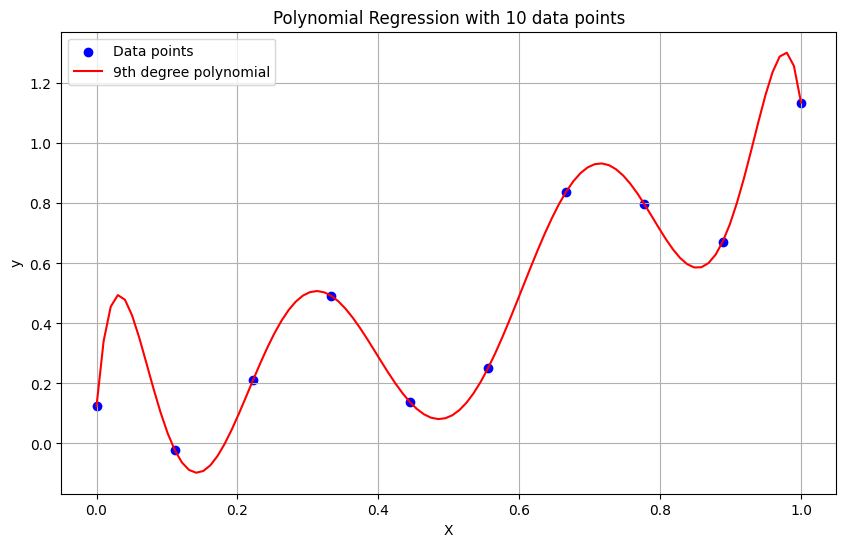

1.7426412444536675e-23

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)

X = np.linspace(0, 1, 10).reshape(10, 1)
y = X**2 + np.random.normal(0, 0.25, (10, 1))

poly_features = PolynomialFeatures(degree=9, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_new = np.linspace(0, 1, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_pred = lin_reg.predict(X_new_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label="Data points")
plt.plot(X_new, y_pred, color='red', label="9th degree polynomial")
plt.title("Polynomial Regression with 10 data points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

mse_10_points = mean_squared_error(y, lin_reg.predict(X_poly))

mse_10_points


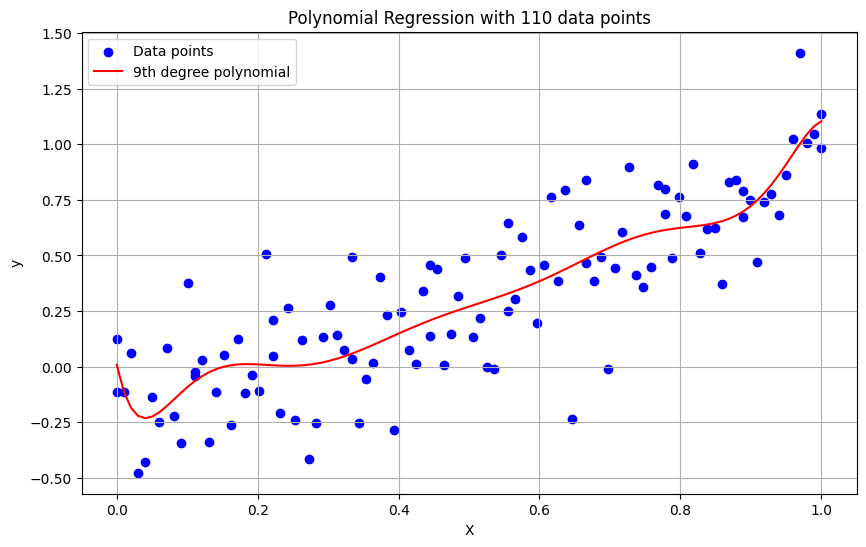

0.045777477220369615

In [2]:
X_additional = np.linspace(0, 1, 100).reshape(100, 1)
y_additional = X_additional**2 + np.random.normal(0, 0.25, (100, 1))

X_combined = np.vstack((X, X_additional))
y_combined = np.vstack((y, y_additional))

X_combined_poly = poly_features.fit_transform(X_combined)

lin_reg_combined = LinearRegression()
lin_reg_combined.fit(X_combined_poly, y_combined)

y_pred_combined = lin_reg_combined.predict(X_new_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X_combined, y_combined, color='blue', label="Data points")
plt.plot(X_new, y_pred_combined, color='red', label="9th degree polynomial")
plt.title("Polynomial Regression with 110 data points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

mse_110_points = mean_squared_error(y_combined, lin_reg_combined.predict(X_combined_poly))

mse_110_points


Question 2: Code from scratch \
Implement the convolution function
- Input: X, W, stride, padding
- Output: Y \
Check again with the convolution function implemented in the Pytorch library

In [3]:
def convolution_2d(X, W, stride=1, padding=0):
    X_padded = np.pad(X, ((padding, padding), (padding, padding)), mode='constant')

    h_out = (X_padded.shape[0] - W.shape[0]) // stride + 1
    w_out = (X_padded.shape[1] - W.shape[1]) // stride + 1

    Y = np.zeros((h_out, w_out))

    for i in range(0, h_out * stride, stride):
        for j in range(0, w_out * stride, stride):
            Y[i // stride, j // stride] = np.sum(X_padded[i:i+W.shape[0], j:j+W.shape[1]] * W)

    return Y

X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

W = np.array([[1, 0],
              [0, -1]])

Y_my_conv = convolution_2d(X, W, stride=1, padding=0)

import torch
import torch.nn.functional as F

X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
W_tensor = torch.tensor(W, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

Y_torch_conv = F.conv2d(X_tensor, W_tensor, stride=1, padding=0)

Y_my_conv, Y_torch_conv.squeeze().numpy()


(array([[-4., -4.],
        [-4., -4.]]),
 array([[-4., -4.],
        [-4., -4.]], dtype=float32))

Question 3:
Given dataset CIFAR-10
- Implement a model similar to VGG16 (maybe shallower) with the above data using Pytorch
- Adjust the learning rate, draw the corresponding loss graph.
- Divide the train/test set in 80/20 ratio, calculate the accuracy, recall, f1-score indexes on the test set.


In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)


100%|██████████| 170498071/170498071 [00:05<00:00, 29906321.66it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
import torch.nn as nn

class VGG_like(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG_like, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 8 * 8, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(256, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = VGG_like().cuda()

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    scheduler.step()


In [8]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

model.eval()
all_preds = []
all_true = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.cuda()
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        all_preds.extend(predicted.cpu().numpy())
        all_true.extend(labels.numpy())

accuracy = accuracy_score(all_true, all_preds)
recall = recall_score(all_true, all_preds, average='macro')
f1 = f1_score(all_true, all_preds, average='macro')

print(f"Accuracy: {accuracy}, Recall: {recall}, F1-score: {f1}")


Accuracy: 0.7723, Recall: 0.7723, F1-score: 0.7737386139839099


Question 4:
Why when building the model, as the layers behind it, width and height decrease but depth increases

In deep learning, especially in Convolutional Neural Networks (CNNs), as we progress deeper into the network:

- Width and Height decrease: This is because of the use of convolution operations (with valid padding) and pooling layers, which reduce the spatial dimensions of the feature maps. This reduction helps the network to focus on the more global and abstract features of the input image, capturing the spatial hierarchies present in the data.

- Depth increases: The depth of the feature maps increases because we use more filters in the deeper layers of the network. Each filter is responsible for capturing different features from the input. As we go deeper, the network tries to capture more complex and high-level features, and therefore, we need more filters to represent those features.

The combination of decreasing spatial dimensions while increasing depth ensures that the computational load remains manageable, even as the network becomes deeper. Moreover, this design helps the network to achieve a form of translation invariance and capture hierarchical features from the input data.